---
title: "Figure and Axes"
author: "Sangkon Han"
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

Matplotlib는 MATLAB과 객체지향 두 가지 코드 스타일을 제공합니다. 대부분의 Matplotlib 사용자는 객체지향 스타일을 좋아하진 않습니다. 그럼에도 불구하고 우리가 객체지향 스타일을 사용하는 이유는 당연히 더 많은 일을 할 수 있기 때문입니다. 대표적인 MATLAB 스타일은 아래와 같습니다.

Text(0.5, 1.0, 'Plot #1')

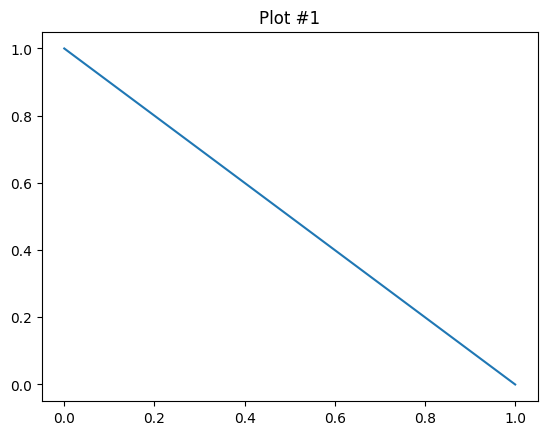

In [2]:
x = (1,0)
y = (0,1)

plt.plot(x,y)
plt.title("Plot #1")

객체지향 스타일은 아래와 같습니다.

Text(0.5, 1.0, 'Plot #2')

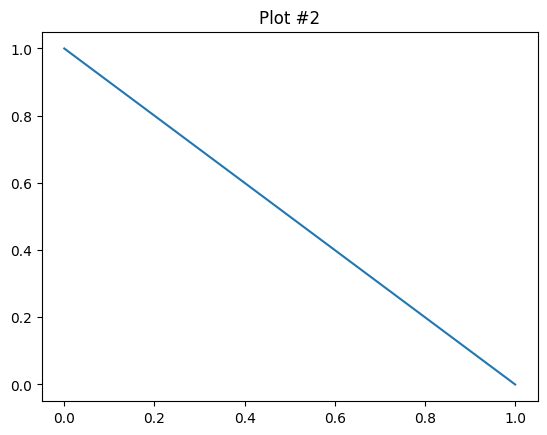

In [3]:
fig, ax = plt.figure(), plt.axes()

ax.plot(x,y)
ax.set_title("Plot #2")

객체지향 스타일을 사용하면 당연히 코드 및 학습량이 늘어날 것이라는 것은 자명합니다. 해당 수업에서 객체지향에 대한 "메서드"를 탐구하는 것보다 주요 속성과 방법을 소개하고 빠르게 우리가 원하는 결과를 활용할 수 있도록 가능하면 핵심적인 내용을 위주로 다루도록 하겠습니다.

![image.png](./image/plt11.png)

## Figure, Axes

플롯(Plot)를 표현하기 위해선 Figure와 Axes 객체가 필요하며, 이 두 객체를 사용해서 플롯이 정의됩니다. Figure 객체는 모든 플롯의 최상위 객체이자, 컨테이너입니다. Axes 객체는 플롯의 세부사항을 표현하기 때문에, 일반적으로 초기에 생성된 객체에 속성을 추가하는 방법으로 코드가 진행됩니다.

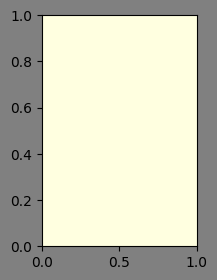

In [4]:
fig = plt.figure(figsize = (2,3), facecolor = 'gray')
ax = plt.axes(facecolor = 'lightyellow')

Axes 객체는 관례상 ax로 불리며, 핵심 객체입니다. 따라서, Matplotlib를 사용함에 있어서 fig와 ax 중 어떤 객체를 활용해야 하는지 세심하게 살펴봐야 합니다.

Text(0.5, 1.0, 'Plot #3')
Plot #3
Plot #4


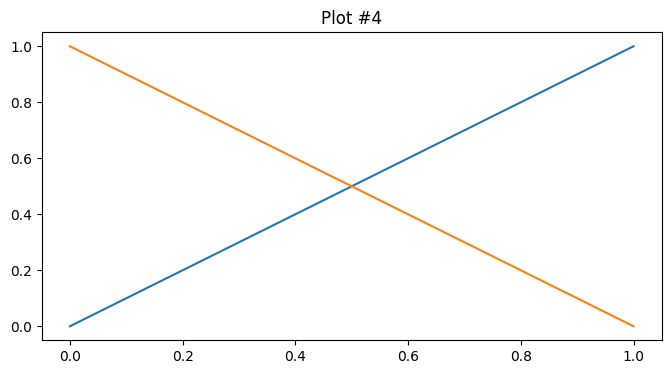

In [5]:
x = np.linspace(0,1,2)

fig, ax = plt.figure(figsize = (8,4)), plt.axes()

ax.plot(x, x)
ax.plot(x, 1 - x)
ax.set_title("Plot #3")
print(ax.title)
print(ax.get_title()) 
ax.set_title("Plot #4")
print(ax.get_title())

Axes의 `set_xlim()` 및 `get_xlim()`은 `set_title()` 및 `get_title()`처럼 동작하지만, ax.xlim으로 간단히 액세스할 수 있는 속성이 없으므로 getter와 setter에 의존하고 있다는 점도 유의해야합니다[^2].

[^2]: getter와 setter는 Pythonic 하지 않습니다.

아래와 같은 형태의 코드 스타일이 대표적인 객체지향 형태의 코드입니다.

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

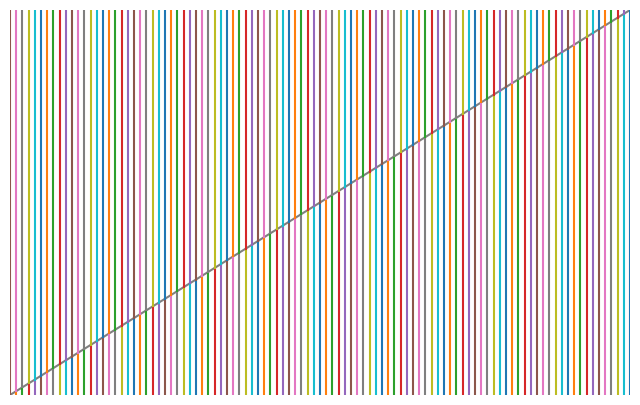

In [6]:
fig, ax = plt.figure(figsize = (8,5)), plt.axes()

x = np.linspace(0,100,2)
ax.plot(x, x, color = 'gray')

ax.set_xlim([0,100])
ax.set_ylim([0,100])

for i in range(101):
    plt.axvline(i,0, i / 100, color = 'C' + str(i))
    plt.axvline(i, i/100, 1, color = 'C' + str(i+5))

plt.axis('off')
# plt.savefig('colorful.pdf')

이런 특성을 반영하여, 아래와 같이 응용할 수 있습니다.

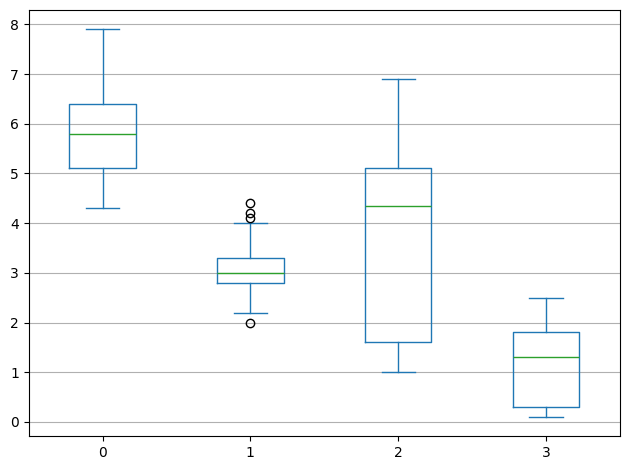

In [7]:
data = load_iris()['data']
df = pd.DataFrame(data)

fig, ax = plt.figure(), plt.axes()

df.plot.box(ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.tight_layout()
# plt.savefig('irisbox.pdf')